In [1]:
import numpy as np
import gymnasium as gym
import matrix_mdp
from tensorflow.sparse import SparseTensor as sparse

### set param (default)
n_states = 4

n_actions = 2

p_0 = np.ones((n_states, )) / n_states

r = np.ones((n_states, n_states, n_actions))

p = np.ones((n_states, n_states, n_actions)) / n_states

In [2]:
n_states = 6 # states cardinality: walkable cells
n_actions = 4 # actions cardinality: up, down, left, right

p_0 = np.ones((n_states, )) / n_states # prior distribution
p = sparse(indices=[(0,0,0)], values=[0], dense_shape=(n_states, n_states, n_actions)) # transition probability
r = sparse(indices=[(0,0,0)], values=[0], dense_shape=(n_states, n_states, n_actions)) # reward function

In [3]:
p

SparseTensor(indices=tf.Tensor([[0 0 0]], shape=(1, 3), dtype=int64), values=tf.Tensor([0], shape=(1,), dtype=int32), dense_shape=tf.Tensor([6 6 4], shape=(3,), dtype=int64))

### maze

In [4]:
from src.maze import Maze
import pygame

# parameters
size_x = 60 # maze width
size_y = 30 # maze height
disp_size = (800, 600) # display size (pixels)
block_size = 10  # block size in pixels
screen = pygame.display.set_mode(disp_size)

# initialize maze
maze = Maze(size_x=size_x, size_y=size_y)

# visualize settings
maze.screen = screen
screen.fill((0, 0, 0))
maze.screen_size = np.asarray(disp_size)
maze.screen_block_size = np.min(disp_size / np.asarray((size_x, size_y)))
maze.screen_block_offset = (disp_size - maze.screen_block_size * np.flip(maze.block_size)) // 2

# generate maze
maze.gen_maze_2D() # + maze.gen_maze_walls()
display(maze.block_size)
display(maze.wall_size)
display(maze.walls.shape)

array([ 61, 121], dtype=int64)

array([30, 60], dtype=int64)

(32, 62, 3)

In [5]:
running = True

while running:
    # visualize maze
    pygame.event.clear() 
    pygame.image.save(screen, 'images/maze.png')
    event = pygame.event.wait() 

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            # quit pygame event
            running = False
            pygame.quit()
            exit()

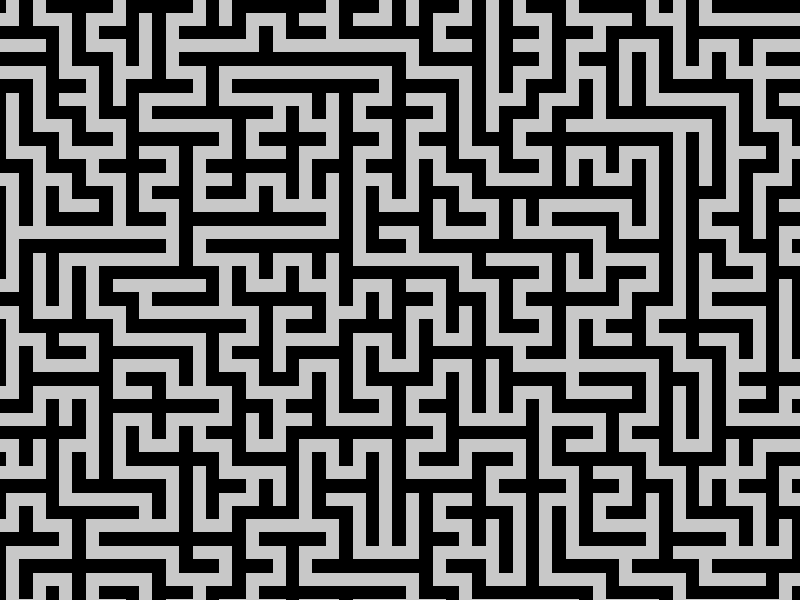

In [6]:
# dispaly figure in 'maze.png'
from IPython.display import Image
Image(filename='images/maze.png', width=400)

### make env

In [7]:
"""
env = gym.make('matrix_mdp/MatrixMDP-v0', p_0=p_0, p=p, r=r, render_mode="human")
env.reset() # reset the environment to the initial state (mandatory before take an action)
for i in range(10):
    #env.render()
    env.step(1)
    print(env.state)
"""

'\nenv = gym.make(\'matrix_mdp/MatrixMDP-v0\', p_0=p_0, p=p, r=r, render_mode="human")\nenv.reset() # reset the environment to the initial state (mandatory before take an action)\nfor i in range(10):\n    #env.render()\n    env.step(1)\n    print(env.state)\n'

: 